# 부스팅(Boosting)
---
**부스팅**(Boosting): 약한 학습기를 결합하여 강력한 학습기를 만드는 앙상블 방법
- 아다부스트(AdaBoost), 그래디언트 부스팅(Gradient Boosting)

# 지도 학습 실습
---
**데이터셋**: creditcard.csv

**이진 분류**(Binary Classification)

**SMOTE**: 불균형 데이터 샘플링 기법(오버 샘플링)

**XGBoost, LightGBM, Random Forest**

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import myutils as my

### 데이터 준비 & 전처리
- 케글: Credit Card Fraud Detection

In [ ]:
credit = pd.read_csv('creditcard.csv')
credit.shape

(284807, 31)

In [ ]:
df = credit.copy()

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

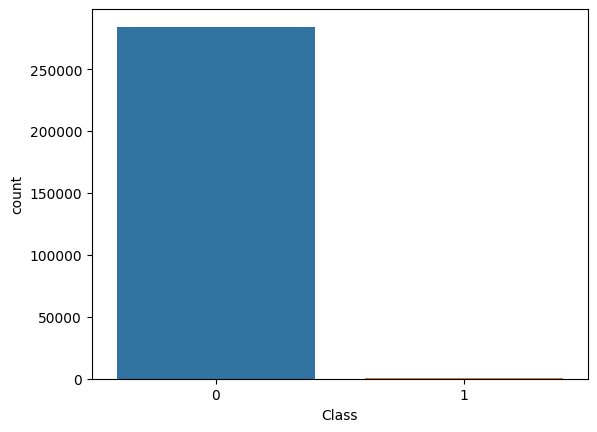

In [ ]:
sns.countplot(x=df['Class'])
plt.show()

- X, y 분리

In [ ]:
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,2.239053e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


- 데이터 분리(train, test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227845, 29) (56962, 29)
(227845,) (56962,)


In [ ]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
amount = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
amount[:10]

array([[-0.20431454],
       [-0.26457898],
       [ 2.13082811],
       [-0.22129436],
       [ 0.8921364 ],
       [ 1.43757829],
       [-0.28517745],
       [-0.13931802],
       [ 2.59707724],
       [-0.16715379]])

In [ ]:
X_train['Amount'] = amount
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204315
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264579
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.130828
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221294
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892136


In [ ]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

### 불균형 데이터 샘플링 기법
**오버 샘플링**(Oversampling)
- SMOTE

**언더 샘플링**(Undersampling)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
X_train_o, y_train_o = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_o.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

### 1. 모델 학습: XGBoost

In [ ]:
%%time
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=42)
clf.fit(X_train_o, y_train_o)

CPU times: user 20min 26s, sys: 1.76 s, total: 20min 28s
Wall time: 12min 45s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
amount = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
X_test['Amount'] = amount

- **예측**

In [ ]:
y_pred = clf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred)

accuracy: 0.9977528878901724
precision: 0.4264705882352941
recall: 0.8877551020408163


- **혼동 행렬**(confusion matrix)

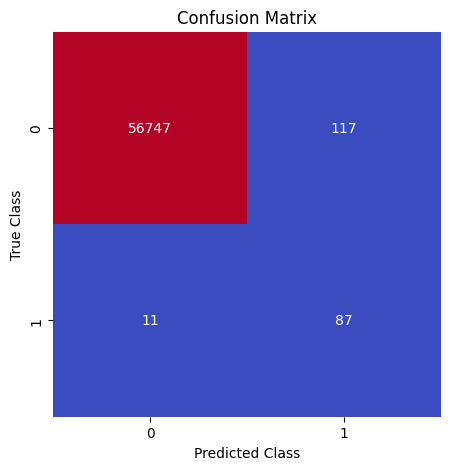

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)

### 2. 모델 학습: LightGBM

In [ ]:
%%time
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=300, max_depth=4, learning_rate=0.1, random_state=42)
clf.fit(X_train_o, y_train_o)

CPU times: user 40.9 s, sys: 255 ms, total: 41.2 s
Wall time: 24.7 s


LGBMClassifier(max_depth=4, n_estimators=300, random_state=42)

- **예측**

In [ ]:
y_pred = clf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred)

accuracy: 0.9977353323268143
precision: 0.4228855721393035
recall: 0.8673469387755102


- **혼동 행렬**(confusion matrix)

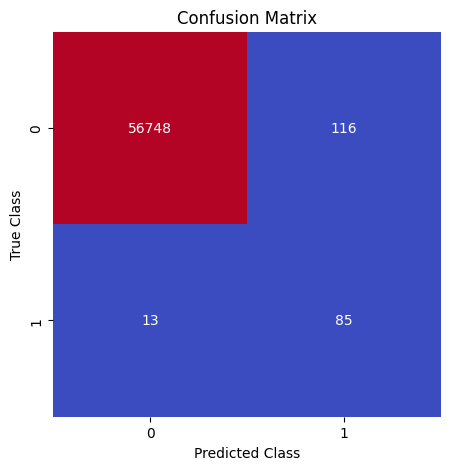

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)

### 3. 모델 학습: Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=4, random_state=42)
clf.fit(X_train_o, y_train_o)

CPU times: user 7min 45s, sys: 549 ms, total: 7min 46s
Wall time: 7min 48s


RandomForestClassifier(max_depth=4, n_estimators=300, random_state=42)

- **예측**

In [ ]:
y_pred = clf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

- **성능 평가**

In [ ]:
my.print_score(y_test, y_pred)

accuracy: 0.9942066640918507
precision: 0.21428571428571427
recall: 0.8877551020408163


- **혼동 행렬**(confusion matrix)

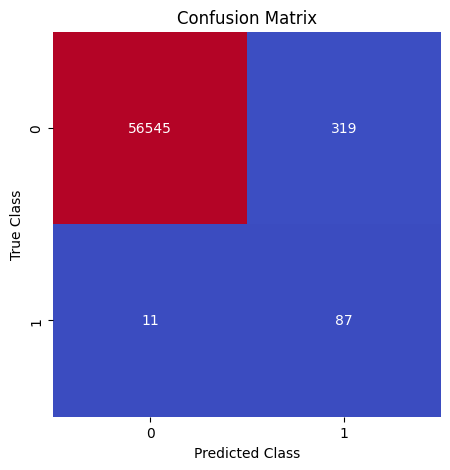

In [ ]:
my.plot_confusion_matrix(y_test, y_pred)